In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf


random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error as mse

In [3]:
import pandas as pd

csv_file_path = 'close.csv'

df = pd.read_csv(csv_file_path, header=None)

close = df[0].tolist()
logclose = np.log(close).tolist()




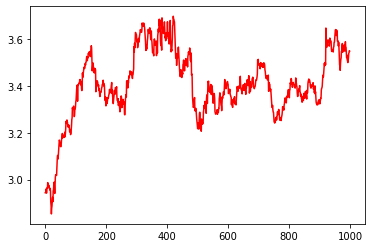

In [4]:
from math import floor

size = len(logclose)-100
close_train, close_test = close[0:size], close[size:len(close)]
logclose_train, logclose_test = logclose[0:size], logclose[size:len(logclose)]

series = logclose
train = logclose_train
test = logclose_test

plt.plot(series , color = 'r')
plt.show()


In [5]:
predicted_list, error_list = [], []
training_data = train

In [6]:
import pandas as pd

csv_file_path = 'forecasted_logclose_ARIMA_t.csv'

df = pd.read_csv(csv_file_path, header=None)

predicted_list = df[0].tolist()

print(predicted_list)

[3.3397, 3.3369, 3.3207, 3.3289, 3.3414, 3.3445, 3.3453, 3.3845, 3.3877, 3.3884, 3.4019, 3.4256, 3.4427, 3.4383, 3.4401, 3.4598, 3.4901, 3.4968, 3.4854, 3.4931, 3.5035, 3.4915, 3.6489, 3.6018, 3.5549, 3.5734, 3.5824, 3.5804, 3.6034, 3.5975, 3.5848, 3.5997, 3.6049, 3.5632, 3.5881, 3.6143, 3.5823, 3.5968, 3.6023, 3.5825, 3.5601, 3.5569, 3.5497, 3.5556, 3.5572, 3.5442, 3.5447, 3.5704, 3.5602, 3.5823, 3.5913, 3.5952, 3.6166, 3.6413, 3.6323, 3.6178, 3.6205, 3.6338, 3.6289, 3.6383, 3.5899, 3.5937, 3.5975, 3.571, 3.5874, 3.572, 3.5185, 3.4923, 3.5018, 3.4679, 3.4971, 3.5243, 3.5156, 3.5432, 3.5556, 3.5605, 3.5734, 3.5485, 3.5406, 3.5581, 3.5618, 3.5646, 3.5678, 3.5764, 3.542, 3.5662, 3.596, 3.5607, 3.5628, 3.5497, 3.5186, 3.533, 3.5245, 3.5055, 3.5024, 3.5193, 3.5171, 3.5391, 3.5518, 3.5453]


In [7]:
for t in range(len(test)):
    predicted_value = predicted_list[t]
    obs = test[t]
    error_list.append(obs - predicted_value)
    training_data.append(obs)
    print('predicted=%f, expected=%f error=%f' % (predicted_value, obs,abs(predicted_value-obs)))

predicted=3.339700, expected=3.335414 error=0.004286
predicted=3.336900, expected=3.323236 error=0.013664
predicted=3.320700, expected=3.330059 error=0.009359
predicted=3.328900, expected=3.338613 error=0.009713
predicted=3.341400, expected=3.347093 error=0.005693
predicted=3.344500, expected=3.346741 error=0.002241
predicted=3.345300, expected=3.382354 error=0.037054
predicted=3.384500, expected=3.389462 error=0.004962
predicted=3.387700, expected=3.391820 error=0.004120
predicted=3.388400, expected=3.399195 error=0.010795
predicted=3.401900, expected=3.426215 error=0.024315
predicted=3.425600, expected=3.445533 error=0.019933
predicted=3.442700, expected=3.436243 error=0.006457
predicted=3.438300, expected=3.440098 error=0.001798
predicted=3.440100, expected=3.460095 error=0.019995
predicted=3.459800, expected=3.487069 error=0.027269
predicted=3.490100, expected=3.496811 error=0.006711
predicted=3.496800, expected=3.485845 error=0.010955
predicted=3.485400, expected=3.488903 error=0.

In [8]:
error = mse(test, predicted_list)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


In [9]:
import pandas as pd

csv_file_path = 'rawResiduals_ARIMA_t.csv'

df = pd.read_csv(csv_file_path, header=None)

training_error = np.array(df[0].tolist())

print(training_error)


[ 9.9940e-04 -5.2913e-03 -5.4572e-03 -3.9555e-03 -1.7667e-02  1.1522e-02
  1.6256e-03  4.0953e-03  2.8813e-02 -7.6955e-03  8.4683e-04  1.4226e-02
  4.2756e-03 -1.6670e-03  1.2601e-02 -5.3433e-03  1.4776e-02 -1.5671e-03
 -4.7041e-02 -1.0442e-02 -3.0213e-02  1.6427e-02  1.0127e-02  2.5171e-02
  4.2323e-03 -1.9276e-02  4.6110e-02 -6.1219e-04  2.1044e-02  1.0868e-02
 -3.2777e-02 -2.5679e-02  3.7889e-02  2.5639e-02  4.9663e-03  3.4515e-03
 -3.0544e-03 -6.8821e-03  4.0658e-02  2.1679e-02  1.8553e-02  9.1196e-03
 -1.7408e-02  1.6815e-02  2.6455e-02  1.4654e-02  2.0345e-02  3.2786e-03
 -9.8458e-03 -1.6951e-02  3.7104e-03 -7.8331e-03 -1.5181e-03  2.4306e-02
  5.6752e-03  4.0330e-03  1.4076e-02 -2.3522e-02  7.6779e-04  6.3513e-03
 -3.8247e-03 -4.9601e-03 -4.7768e-03  6.0050e-03  6.0572e-03 -1.5684e-02
  1.0938e-02  1.6732e-02  3.4247e-02 -9.2893e-03  8.4079e-03  1.0664e-02
 -9.1241e-03 -4.7332e-03 -1.2729e-02 -4.1147e-03 -2.8609e-04  8.8791e-03
 -6.7781e-03 -1.3015e-02 -1.3850e-02  5.2804e-03 -3

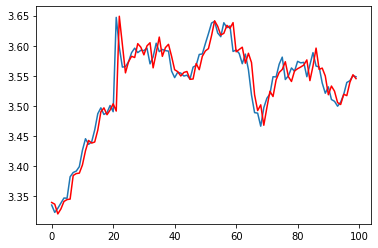

Test MSE: 0.000591


In [10]:
plt.plot(test)
plt.plot(predicted_list, color='red')
plt.show()

error = mse(test,predicted_list)
print('Test MSE: %.6f' % error)

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse


training_error = np.array(training_error).reshape(-1,1)

In [ ]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
import warnings

warnings.filterwarnings("ignore")

def make_model(num_layers, neurons, activation, initializer, optimizer, dropout_rate, window_size):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    model = Sequential()
    model.add(Dense(neurons[0], input_dim=window_size, kernel_initializer=initializer, activation=activation))
    model.add(Dropout(dropout_rate))
    for i in range(1, num_layers):
        model.add(Dense(neurons[i], kernel_initializer=initializer, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

space = {
    "window_size": hp.choice("window_size", list(range(2, 20))), 
    "num_layers_choice": hp.choice("num_layers_choice", [
         { 
             "num_layers": 1,
             "neurons": hp.quniform("neurons_1", 2, 299, 1)
         }
    ]),
    "activation": hp.choice("activation", ["sigmoid", "tanh", "relu", "elu"]),
    "initializer": hp.choice("initializer", ["uniform", "glorot_uniform", "he_uniform"]),
    "optimizer": hp.choice("optimizer", ["adam", "sgd", "rmsprop"]),
    "dropout_rate": hp.uniform("dropout_rate", 0.0, 0.5),
    "batch_size": hp.quniform("batch_size", 8, 128, 1)
}


def objective(params):

    window_size = params["window_size"]

    scaler = StandardScaler()
    training_error_scaled = scaler.fit_transform(training_error)

    arch = params["num_layers_choice"]
    if arch["num_layers"] == 1:
        num_layers = 1
        neurons = [int(arch["neurons"])]
    if arch["num_layers"] == 2:
        num_layers = 2
        neurons = [int(arch["neurons1"]), int(arch["neurons2"])]
    if arch["num_layers"] == 3:
        num_layers = 3
        neurons = [int(arch["neurons1"]), int(arch["neurons2"]), int(arch["neurons3"])]
    
    
    activation = params["activation"]
    initializer = params["initializer"]
    optimizer_param = params["optimizer"]
    dropout_rate = params["dropout_rate"]
    batch_size = int(params["batch_size"])
    
    train_X, train_Y = [], []
    for i in range(len(training_error_scaled) - window_size):
        train_X.append(training_error_scaled[i:i+window_size])
        train_Y.append(training_error_scaled[i+window_size])
    new_train_X = np.array([x.reshape(-1) for x in train_X])
    new_train_Y = np.array(train_Y).ravel()
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
    epochs = 2000
    validation_split = 0.10
    
    modelKeras = KerasRegressor(
        model=make_model,
        window_size=window_size,
        model__num_layers=num_layers,
        model__neurons=neurons,
        model__activation=activation,
        model__initializer=initializer,
        model__optimizer=optimizer_param,
        model__dropout_rate=dropout_rate,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=validation_split,
        callbacks=callbacks,
        shuffle=False, 
        random_state=42,    
        verbose=0
    )
    
    tscv = TimeSeriesSplit(n_splits=2)
    score = np.mean(cross_val_score(modelKeras, new_train_X, new_train_Y, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1))

    
    print(f"Params: {params}, Score: {score:.4f}")

    return {"loss": -score, "status": STATUS_OK}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials,
            rstate=np.random.default_rng(42))

best_loss = trials.best_trial['result']['loss']
best_score = best_loss

print("\n------------------------")
print("BEST OVERALL RESULTS:")
print("------------------------")
print("Raw best parameters (indices/values):")
print(best)
print(f"Best score: {best_score:.4f}")

Params: {'activation': 'elu', 'batch_size': 100.0, 'dropout_rate': 0.32587119987444696, 'initializer': 'glorot_uniform', 'num_layers_choice': {'neurons': 186.0, 'num_layers': 1}, 'optimizer': 'rmsprop', 'window_size': 2}, Score: -1.0492
Params: {'activation': 'elu', 'batch_size': 76.0, 'dropout_rate': 0.029968094540700263, 'initializer': 'he_uniform', 'num_layers_choice': {'neurons': 183.0, 'num_layers': 1}, 'optimizer': 'adam', 'window_size': 17}, Score: -1.3011
Params: {'activation': 'relu', 'batch_size': 77.0, 'dropout_rate': 0.07858985028094856, 'initializer': 'uniform', 'num_layers_choice': {'neurons': 24.0, 'num_layers': 1}, 'optimizer': 'adam', 'window_size': 4}, Score: -1.0472
Params: {'activation': 'relu', 'batch_size': 17.0, 'dropout_rate': 0.35223000813752336, 'initializer': 'glorot_uniform', 'num_layers_choice': {'neurons': 65.0, 'num_layers': 1}, 'optimizer': 'sgd', 'window_size': 13}, Score: -1.1936
Params: {'activation': 'tanh', 'batch_size': 49.0, 'dropout_rate': 0.1730

In [ ]:
window_sizes = list(range(2, 20))
activations_list = ["sigmoid", "tanh", "relu", "elu"]
initializers_list = ["uniform", "glorot_uniform", "he_uniform"]
optimizers_list = ["adam", "sgd", "rmsprop"]

best_window_size = window_sizes[ best["window_size"] ]
best_activation = activations_list[ best["activation"] ]
best_initializer = initializers_list[ best["initializer"] ]
best_optimizer = optimizers_list[ best["optimizer"] ]
best_dropout_rate = best["dropout_rate"]
best_batch_size = int(best["batch_size"])


if best["num_layers_choice"] == 0:
    best_num_layers = 1
    best_neurons = [int(best["neurons_1"])]
if best["num_layers_choice"] == 1:
    best_num_layers = 2
    best_neurons = [int(best["neurons_2_1"]), int(best["neurons_2_2"])]
if best["num_layers_choice"] == 2:
    best_num_layers = 3
    best_neurons = [int(best["neurons_3_1"]), int(best["neurons_3_2"]), int(best["neurons_3_3"])]
    

scaler = StandardScaler()
training_error_scaled = scaler.fit_transform(training_error)

train_X, train_Y = [], []
for i in range(0, len(training_error_scaled) - best_window_size):
    train_X.append(training_error_scaled[i:i+best_window_size])
    train_Y.append(training_error_scaled[i+best_window_size])
new_train_X = np.array([x.reshape(-1) for x in train_X])
new_train_Y = np.array(train_Y).ravel()


final_model = make_model(
    num_layers=best_num_layers,
    neurons=best_neurons,
    activation=best_activation,
    initializer=best_initializer,
    optimizer=best_optimizer,
    dropout_rate=best_dropout_rate,
    window_size=best_window_size
)

final_model.fit(new_train_X, new_train_Y,
                batch_size=best_batch_size,
                epochs=2000,
                validation_split=0.10,
                callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
                shuffle=False,  
                verbose=1)

Epoch 1/2000
48/48 [==============================] - 0s 3ms/step - loss: 1.0681 - val_loss: 0.4450
Epoch 2/2000
48/48 [==============================] - 0s 1ms/step - loss: 1.0540 - val_loss: 0.4445
Epoch 3/2000
48/48 [==============================] - 0s 1ms/step - loss: 1.0495 - val_loss: 0.4456
Epoch 4/2000
48/48 [==============================] - 0s 1ms/step - loss: 1.0401 - val_loss: 0.4468
Epoch 5/2000
48/48 [==============================] - 0s 1ms/step - loss: 1.0404 - val_loss: 0.4474
Epoch 6/2000
48/48 [==============================] - 0s 1ms/step - loss: 1.0345 - val_loss: 0.4493
Epoch 7/2000
48/48 [==============================] - 0s 1ms/step - loss: 1.0269 - val_loss: 0.4505
Epoch 8/2000
48/48 [==============================] - 0s 1ms/step - loss: 1.0289 - val_loss: 0.4510
Epoch 9/2000
48/48 [==============================] - 0s 988us/step - loss: 1.0183 - val_loss: 0.4526
Epoch 10/2000
48/48 [==============================] - 0s 1ms/step - loss: 1.0172 - val_loss: 0.45

In [14]:
print(best_window_size)
print(best_activation)
print(best_initializer)
print(best_optimizer)
print(best_dropout_rate)
print(best_batch_size) 
print(best_neurons) 

6
relu
uniform
sgd
0.1301930911572079
17
[142]


In [15]:
window_size = best_window_size
model = final_model

28/28 [==============================] - 0s 577us/step


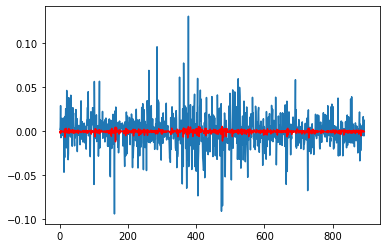

Train MSE: 0.000394


In [ ]:
predictions = model.predict(new_train_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))
Y = pd.DataFrame(training_error[window_size:])
pred = pd.DataFrame(predictions_rescaled)
plt.plot(Y, label='ARIMA Residuals')
plt.plot(pred , color = 'r', label='ML Predictions')
plt.show()
error = mse(training_error[window_size:],predictions_rescaled)
print('Train MSE: %.6f' % error)

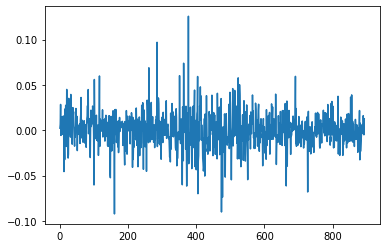

In [17]:
rawResiduals_ARIMA_t_FNN = Y - pred
plt.plot(rawResiduals_ARIMA_t_FNN)
plt.show()

rawResiduals_ARIMA_t_FNN.to_csv('rawResiduals_ARIMA_t_FNN_BO-TPE_standardscaler.csv', index=False)

4/4 [==============================] - 0s 4ms/step


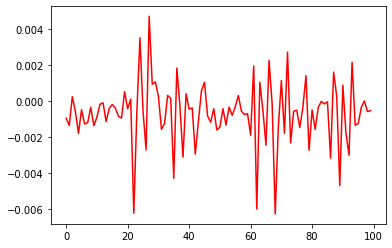

Test MSE: 0.000567


In [ ]:
test_extended = training_error.tolist()[-1*window_size:] + error_list
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
        

test_data = np.array(test_data).reshape(-1,1)
test_scaled = scaler.transform(test_data)

test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)


predictions = model.predict(new_test_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))


Y = pd.DataFrame(error_list)
pred = pd.DataFrame(predictions_rescaled)

plt.plot(predictions_rescaled , color = 'r')
plt.show()
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

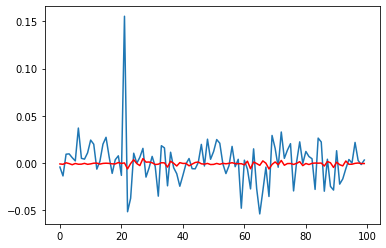

Test MSE: 0.000567


In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.show()
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

Hybrid Test MSE: 0.000567


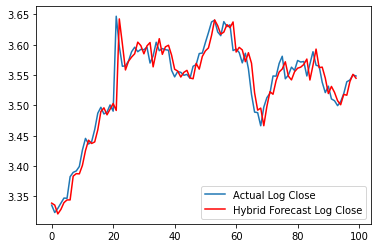

In [ ]:
predicted_array = np.array(predicted_list)
final_pred = predicted_array+predictions_rescaled.flatten()
hybrid_error = mse(np.array(test), final_pred)
print('Hybrid Test MSE: %.6f' % hybrid_error)

plt.plot(pd.DataFrame(test), label="Actual Log Close")
plt.plot(pd.DataFrame(final_pred), color='r', label="Hybrid Forecast Log Close")
plt.legend()
plt.show()

In [22]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on logclose: ")
print(compute_error_metrics(test, final_pred))
print(compute_directional_metrics(test, final_pred))


Errors on logclose: 
{'NMSE': 0.10017362940814628, 'MAE': 0.015519969878485095, 'RMSE': 0.02381537065916308, 'MSE': 0.0005671718796333258, 'MAPE': 0.43768563612120237, 'TheilsU': 1.0298003889836789}
{'DS': 0.5252525252525253, 'CU': 0.5964912280701754, 'CD': 0.42857142857142855}


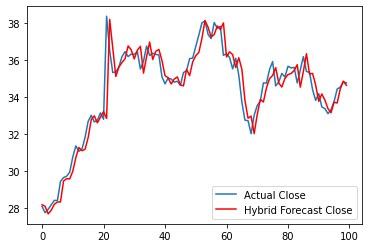

Test MSE: 0.697931


In [23]:
close_pred = np.exp(final_pred)
Y = pd.DataFrame(close_test)
pred = pd.DataFrame(close_pred)
plt.plot(Y, label="Actual Close")
plt.plot(pred , color = 'r', label="Hybrid Forecast Close")
plt.legend()
plt.show()

error = mse(close_test,close_pred)
print('Test MSE: %.6f' % error)

In [24]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on close: ")
print(compute_error_metrics(close_test, close_pred))
print(compute_directional_metrics(close_test, close_pred))

Errors on close: 
{'NMSE': 0.1139029110260796, 'MAE': 0.5369272655686914, 'RMSE': 0.8354226837395572, 'MSE': 0.6979310605066043, 'MAPE': 1.5433457065734204, 'TheilsU': 1.0277953320677373}
{'DS': 0.5252525252525253, 'CU': 0.5964912280701754, 'CD': 0.42857142857142855}


Stock: 28.09 Action: Buy Portfolio: 28090.0 Stocks: 1000 Balance_init: 0 total($) 28090.0
Stock: 27.75 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 27750.0
Stock: 27.94 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 27750.0
Stock: 28.18 Action: Buy Portfolio: 27729.12 Stocks: 984 Balance_init: 20 total($) 27749.12
Stock: 28.42 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 27985.28
Stock: 28.41 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 27985.28
Stock: 29.44 Action: Buy Portfolio: 27968.0 Stocks: 950 Balance_init: 17 total($) 27985.0
Stock: 29.65 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28184.5
Stock: 29.72 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28184.5
Stock: 29.94 Action: Buy Portfolio: 28173.54 Stocks: 941 Balance_init: 10 total($) 28183.54
Stock: 30.76 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0

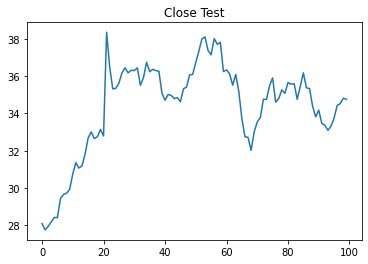

Final value of stock:
34.76


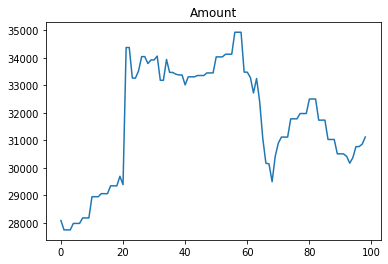

Final value of portfolio:
31123.0


In [ ]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from trading_strategies import trading_strategy1

trading_strategy1(close_test, close_pred)
            